In [ ]:
import torch
from torch import optim, nn
import torchvision
from torchvision import datasets, models, transforms
import PIL
import numpy as np
import torch.nn.functional as F

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 7, 9

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(trainset[i][0]) for _ in range(6)))
                   for i in range(4)))
  plt.imshow(img)
  plt.axis('off')

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


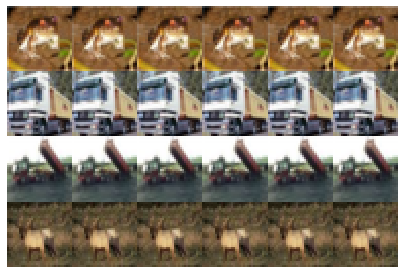

In [ ]:

show_dataset(trainset)

#Visualising Augmentations


In [ ]:
transforms = torchvision.transforms.Compose([
    # torchvision.transforms.Resize((224,224)),
    # torchvision.transforms.RandomResizedCrop(24),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transforms)

Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


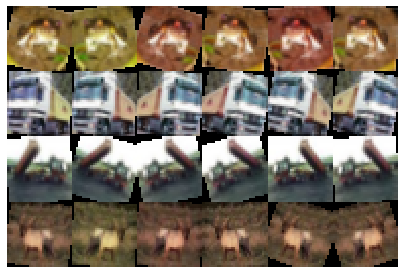

In [ ]:
show_dataset(trainset)

In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.CenterCrop(224),
    # torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    # torchvision.transforms.RandomHorizontalFlip(),
    # torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


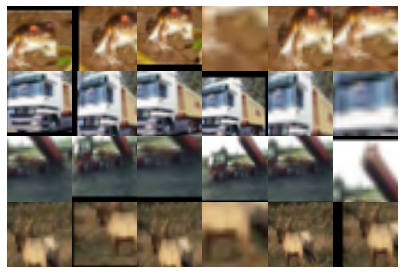

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transforms)
show_dataset(trainset)

In [ ]:
pip install torchtoolbox

     |████████████████████████████████| 61kB 7.1MB/s 


In [ ]:
from torchvision import transforms
from torchtoolbox.transform import Cutout

transforms = torchvision.transforms.Compose([
    # torchvision.transforms.RandomResizedCrop(224),
    Cutout(),
    torchvision.transforms.RandomHorizontalFlip(),
    # torchvision.transforms.ColorJitter(0.4, 0.4, 0.4),
])

Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


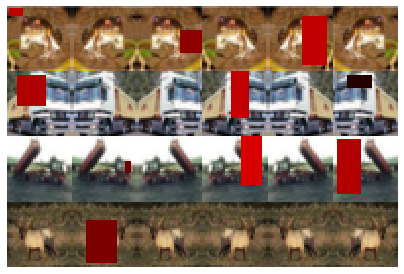

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transforms)
show_dataset(trainset)

In [ ]:
!pip install git+https://github.com/aleju/imgaug
from imgaug import augmenters as iaa
import imgaug as ia


  Cloning https://github.com/aleju/imgaug to /tmp/pip-req-build-xbm02zoa
  Running command git clone -q https://github.com/aleju/imgaug /tmp/pip-req-build-xbm02zoa
  Created wheel for imgaug: filename=imgaug-0.4.0-cp36-none-any.whl size=971107 sha256=7312efdc8c1ac42cbe0d703d36b870bde2d299120dcf1ae4c165fdcb84e6cf75
  Stored in directory: /tmp/pip-ephem-wheel-cache-6qmnusiw/wheels/9c/f6/aa/41dcf2f29cc1de1da4ad840ef5393514bead64ac9e644260ff
Successfully built imgaug


In [ ]:
!rm -rf './sample_data'

In [ ]:
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 3.0))),
        # iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms = ImgAugTransform()


/usr/local/lib/python3.6/dist-packages/imgaug/imgaug.py:188: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  warn_deprecated(msg, stacklevel=3)


Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


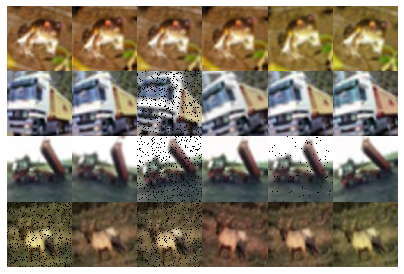

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transforms)
show_dataset(trainset)

In [ ]:
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Sometimes(0.5,iaa.Cutout()),
        # iaa.Fliplr(0.5),
        # iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        # iaa.Sometimes(0.25,
        #               iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
        #                          iaa.CoarseDropout(0.1, size_percent=0.5)])),
        # iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms = ImgAugTransform()


/usr/local/lib/python3.6/dist-packages/imgaug/imgaug.py:188: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  warn_deprecated(msg, stacklevel=3)


Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


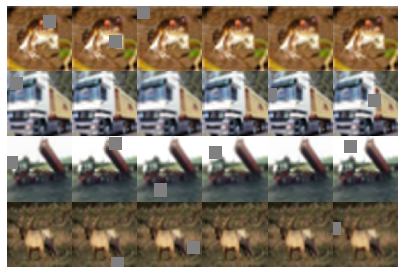

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transforms)
show_dataset(trainset)

In [ ]:

class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.25,iaa.SaltAndPepper(0.02)),
        iaa.Fliplr(0.5),
        # iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        # iaa.Sometimes(0.25,
        #               iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
        #                          iaa.CoarseDropout(0.1, size_percent=0.5)])),
        # iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms = ImgAugTransform()


/usr/local/lib/python3.6/dist-packages/imgaug/imgaug.py:188: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  warn_deprecated(msg, stacklevel=3)


Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


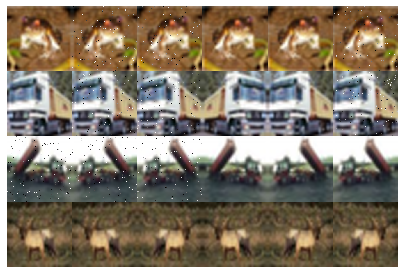

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transforms)
show_dataset(trainset)

#Training model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import PIL
import numpy as np
import os
import argparse
import matplotlib.pyplot as plt

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, dropRate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.droprate = dropRate
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10, dropRate=0.0):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], dropRate, stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], dropRate, stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], dropRate, stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], dropRate, stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, dropRate, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, dropRate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [ ]:
def ResNet18(rate):
    return ResNet(BasicBlock, [2, 2, 2, 2], dropRate = rate)

In [ ]:
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.1,iaa.SaltAndPepper(0.02)),
        iaa.Sometimes(0.1, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Sometimes(0.1,iaa.Cutout()),

    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

# transforms = ImgAugTransform()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([                                  
    # transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(hue=0.05, saturation=0.05),
    transforms.RandomHorizontalFlip(),
    # transforms.CenterCrop(10),
    transforms.RandomApply(torch.nn.ModuleList([transforms.GaussianBlur(3, sigma=(0.1, 1.0)),]), p=0.1),
    # transforms.GaussianBlur(3, sigma=(0.1, 1.0)),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    # ImgAugTransform(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainset, val_set = torch.utils.data.random_split(trainset, [5000, 45000])

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Training
def train(epoch):
    # print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print('Train Epoch: {} [{}/{} ({:.0f}%)] \tAcc: {:.3f}% ({}/{}) \tLoss: {:.6f}'.format(
              epoch, batch_idx * len(inputs), len(trainloader.dataset), 100. * batch_idx / len(trainloader), 100.*correct/total, correct, total, train_loss/(batch_idx+1)))
    return 100.*correct/total, train_loss/(batch_idx+1)

def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        print(
            '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss/(batch_idx+1), correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        # print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        # if not os.path.isdir('checkpoint'):
        #     os.mkdir('checkpoint')
        # torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc
    return acc, test_loss/(batch_idx+1)


In [ ]:
# Model
print('==> Building model..')
net = ResNet18(0.0)
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

lr = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
train_acc = []
test_acc = []
train_loss = []
test_loss = []
for epoch in range(0, 81):
    
    acc, loss = train(epoch)
    if epoch%10==0:
      train_acc.append(acc)
      train_loss.append(loss)
    acc, loss = test(epoch)
    if epoch%10==0:
      test_acc.append(acc)
      test_loss.append(loss)
    scheduler.step()

==> Building model..
Train Epoch: 0 [312/5000 (98%)] 	Acc: 11.660% (583/5000) 	Loss: 3.680726

Test set: Average loss: 2.8454, Accuracy: 1034/10000 (10%)

Train Epoch: 1 [312/5000 (98%)] 	Acc: 19.340% (967/5000) 	Loss: 2.139407

Test set: Average loss: 2.0380, Accuracy: 2242/10000 (22%)

Train Epoch: 2 [312/5000 (98%)] 	Acc: 23.140% (1157/5000) 	Loss: 2.020309

Test set: Average loss: 1.9835, Accuracy: 2408/10000 (24%)

Train Epoch: 3 [312/5000 (98%)] 	Acc: 25.360% (1268/5000) 	Loss: 1.979736

Test set: Average loss: 1.9344, Accuracy: 2703/10000 (27%)

Train Epoch: 4 [312/5000 (98%)] 	Acc: 26.000% (1300/5000) 	Loss: 1.950588

Test set: Average loss: 1.9807, Accuracy: 2656/10000 (27%)

Train Epoch: 5 [312/5000 (98%)] 	Acc: 28.020% (1401/5000) 	Loss: 1.897270

Test set: Average loss: 1.8701, Accuracy: 2824/10000 (28%)

Train Epoch: 6 [312/5000 (98%)] 	Acc: 29.680% (1484/5000) 	Loss: 1.881000

Test set: Average loss: 1.8464, Accuracy: 3162/10000 (32%)

Train Epoch: 7 [312/5000 (98%)] 	Acc

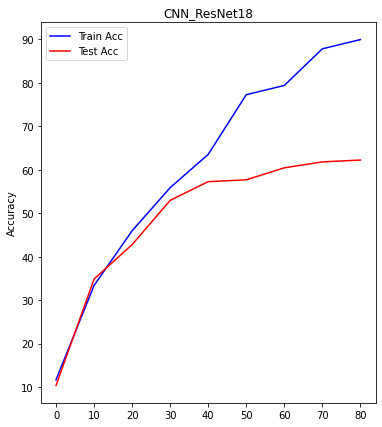

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

epochs = np.linspace(0, 80, 9, endpoint=True)
plt.figure(figsize=(6, 7))
line1, = plt.plot(epochs, train_acc, 'b', label='Train Acc')
line2, = plt.plot(epochs, test_acc, 'r', label='Test Acc')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend()
plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
plt.title('CNN_ResNet18')
plt.show()

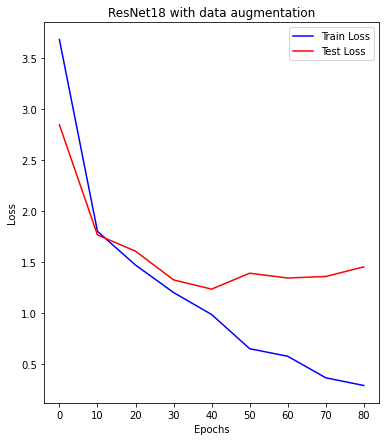

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6, 7))
epochs = np.linspace(0, 80, 9, endpoint=True)
line1, = plt.plot(epochs, train_loss, 'b', label='Train Loss')
line2, = plt.plot(epochs, test_loss, 'r', label='Test Loss')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('ResNet18 with data augmentation')
plt.show()

#Varying droupout rates

In [ ]:
# drop_rate = np.linspace(0, 0.5, 6, endpoint=True)
# drop_rate

In [ ]:
drop_rate = np.linspace(0, 0.5, 6, endpoint=True)
train_acc = []
test_acc = []
train_loss = []
test_loss = []
for i in drop_rate:
  print(i)
  # Model
  print('==> Building model..')
  net = ResNet18(i)
  net = net.to(device)
  if device == 'cuda':
      net = torch.nn.DataParallel(net)
      cudnn.benchmark = True
  epochs = 75
  lr = 0.1
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr,
                        momentum=0.9, weight_decay=5e-4)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
  for epoch in range(0, epochs):
    
    acc, loss = train(epoch)
    if epoch==epochs-1:
      train_acc.append(acc)
      train_loss.append(loss)
    acc, loss = test(epoch)
    if epoch==epochs-1:
      test_acc.append(acc)
      test_loss.append(loss)
    scheduler.step()


0.0
==> Building model..
Train Epoch: 0 [312/5000 (98%)] 	Acc: 15.480% (774/5000) 	Loss: 2.996552

Test set: Average loss: 2.9500, Accuracy: 1885/10000 (19%)

Train Epoch: 1 [312/5000 (98%)] 	Acc: 20.600% (1030/5000) 	Loss: 2.223653

Test set: Average loss: 2.5343, Accuracy: 1690/10000 (17%)

Train Epoch: 2 [312/5000 (98%)] 	Acc: 21.580% (1079/5000) 	Loss: 2.136621

Test set: Average loss: 2.1485, Accuracy: 2540/10000 (25%)

Train Epoch: 3 [312/5000 (98%)] 	Acc: 25.320% (1266/5000) 	Loss: 2.058876

Test set: Average loss: 1.9761, Accuracy: 2921/10000 (29%)

Train Epoch: 4 [312/5000 (98%)] 	Acc: 27.380% (1369/5000) 	Loss: 1.952398

Test set: Average loss: 1.8679, Accuracy: 3142/10000 (31%)

Train Epoch: 5 [312/5000 (98%)] 	Acc: 30.280% (1514/5000) 	Loss: 1.897875

Test set: Average loss: 1.9201, Accuracy: 2964/10000 (30%)

Train Epoch: 6 [312/5000 (98%)] 	Acc: 31.180% (1559/5000) 	Loss: 1.865598

Test set: Average loss: 1.8723, Accuracy: 3042/10000 (30%)

Train Epoch: 7 [312/5000 (98%)]

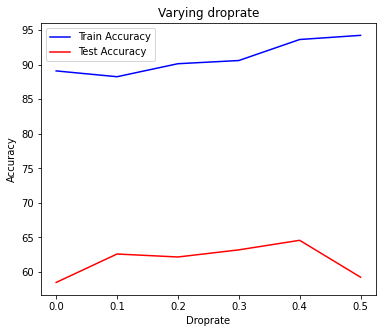

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
fig = plt.figure(figsize=(6,5))
line1, = plt.plot(drop_rate, train_acc, 'b', label='Train Accuracy')
line2, = plt.plot(drop_rate, test_acc, 'r', label='Test Accuracy')
# line3, = plt.plot(drop_rate, val_acc, 'g', label='Val Accuracy')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Droprate')
plt.title('Varying droprate')
plt.show()

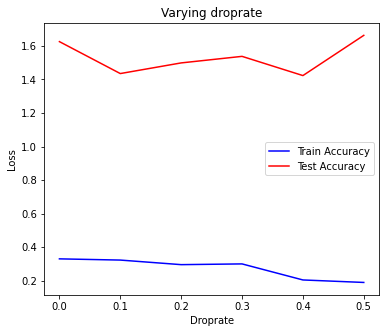

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
fig = plt.figure(figsize=(6,5))
line1, = plt.plot(drop_rate, train_loss, 'b', label='Train Accuracy')
line2, = plt.plot(drop_rate, test_loss, 'r', label='Test Accuracy')
# line3, = plt.plot(drop_rate, val_acc, 'g', label='Val Accuracy')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.legend()
plt.ylabel('Loss')
plt.xlabel('Droprate')
plt.title('Varying droprate')
plt.show()

#Acknowledgement
There are few parts of the assignment where we discussed some aspects with another group (Raghav Gupta and Prakhar Kanchan). This was on a collaborative level, such as sending some links to resources, PyTorch tutorials and some debugging tips. The collaboration was strictly limited to what is permitted in other EE and CSE dept. assignment courses. In no way have copied, cheated or violated the code of conduct.